# prep data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# !pip install pyreadstat

In [63]:
import pyreadstat
wave1_file = 'D:\RRR\Project Athena\Datathon2021\data\W1 Merged Data\Wave.1_Data\Merge\Wave1_20170906.sav'
wave2_file = 'D:\RRR\Project Athena\Datathon2021\data\W2 Merged Data/2w-3rd_release_all\merge\Wave2_20170724.sav'

df1, meta1 = pyreadstat.read_sav(wave1_file)
df2, meta2 = pyreadstat.read_sav(wave2_file)
meta_dict1 = meta1.column_names_to_labels
meta_dict2 = meta2.column_names_to_labels

df1.head(), df2.head()

(   country  idnumber  level3  yrsurvey  se002  se003  se003a  se004  se004a  \
 0      4.0       1.0     1.0    2002.0    1.0    5.0    38.0    NaN     1.0   
 1      4.0       2.0     1.0    2002.0    2.0   10.0    60.0    NaN     1.0   
 2      4.0       3.0     1.0    2002.0    2.0   10.0    69.0    NaN     1.0   
 3      4.0       4.0     1.0    2002.0    2.0    5.0    39.0    NaN     1.0   
 4      4.0       5.0     1.0    2002.0    1.0    7.0    48.0    NaN     1.0   
 
    se005  ...  ir010e  w_jp  w_hk  w_kr      w_cn  w_mo  w_ph  w_tw  w_th  \
 0    5.0  ...     NaN   NaN   NaN   NaN  0.621390   NaN   NaN   NaN   NaN   
 1    4.0  ...     NaN   NaN   NaN   NaN  0.446785   NaN   NaN   NaN   NaN   
 2    1.0  ...     NaN   NaN   NaN   NaN  0.583658   NaN   NaN   NaN   NaN   
 3    8.0  ...     NaN   NaN   NaN   NaN  0.490000   NaN   NaN   NaN   NaN   
 4    4.0  ...     NaN   NaN   NaN   NaN  0.396647   NaN   NaN   NaN   NaN   
 
    w_all  
 0   0.62  
 1   0.45  
 2   0.58  


In [64]:
meta_dict2

{'country': 'Country Code',
 'idnumber': 'Interview Numbers',
 'level3': 'Urban-rural',
 'q1': 'How would you rate the overall economic condition of our country today?',
 'q2': 'How would you describe the change in the economic condition of our country over the last years?',
 'q3': "What do you think will be the state of our country's economic condition a few years from now?",
 'q4': 'As for your own family, how do you rate your economic situation today?',
 'q5': 'How would you compare the current economic condition of your family with what it was a few years ago?',
 'q6': 'What do you think the economic situation of your family will be a few years from now?',
 'q7': 'Trust in Prime Minister or president',
 'q8': 'Trust in the Courts',
 'q9': 'Trust in the national government',
 'q10': 'Trust in Political parties',
 'q11': 'Trust in Parliament',
 'q12': 'Trust in Civil service',
 'q13': 'Trust in the military(or armed forces)',
 'q14': 'Trust in the police',
 'q15': 'Trust in local gov

In [59]:
# find str in dict, return all keys matching str
def find_str_in_dict(str, dict):
    key_seq = []
    for key, value in dict.items():
        # print(type(value))
        if value is not None:
            if str in value:
                key_seq = np.append(key_seq, key)
    
    print(key_seq)
    for key in key_seq:
        print(dict[key])
    
    return None
    
str_lookup = 'income'
find_str_in_dict(str_lookup, meta_dict1)
find_str_in_dict(str_lookup, meta_dict2)

annual income: national quintiles
['se009']
annual income: national quintiles
['se009']


In [24]:
# find string in df columns
# df1.columns[df1.columns.str.contains('q007')]
df2.columns[df2.columns.str.contains('q111')]

Index(['q111'], dtype='object')

# Multiple correspondence analysis (MCA)
https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1

## example code

In [65]:
tips = sns.load_dataset('tips')
tips.drop(['total_bill', 'tip'], axis =1, inplace = True)

In [110]:
tips

,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4
...,...,...,...,...,...
239,Male,No,Sat,Dinner,3
240,Female,Yes,Sat,Dinner,2
241,Male,Yes,Sat,Dinner,2
242,Male,No,Sat,Dinner,2


In [113]:
tips2 = tips[['size']].copy()
tips2['size2'] = tips2['size']**2
tips2

,size,size2
0,2,4
1,3,9
2,3,9
3,2,4
4,4,16
...,...,...
239,3,9
240,2,4
241,2,4
242,2,4


In [121]:
# cast float column to str in df
tips2['size'] = tips2['size'].astype(str)
tips2['size2'] = tips2['size2'].astype(str)
type(tips2['size2'][0])

str

In [67]:
# !pip install prince --user

  Using cached prince-0.7.1-py3-none-any.whl (21 kB)
  Using cached pandas-1.3.4-cp37-cp37m-win_amd64.whl (10.0 MB)


ERROR: otter-grader 2.2.6 requires google-auth-oauthlib, which is not installed.
ERROR: otter-grader 2.2.6 requires gspread, which is not installed.


In [68]:
from prince import MCA
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(tips)
tips_mca = mca.transform(tips)
tips_mca.head()

,0,1
0,-0.179709,-0.372317
1,-0.363840,-0.487036
2,-0.363840,-0.487036
3,-0.415941,-0.550888
4,-0.147590,-0.305220


In [122]:
from prince import MCA
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(tips2)
tips_mca = mca.transform(tips2)
tips_mca.head()

,0,1
0,-0.129099,-0.576453
1,-0.129099,0.151963
2,-0.129099,0.151963
3,-0.129099,-0.576453
4,-0.129099,1.746597


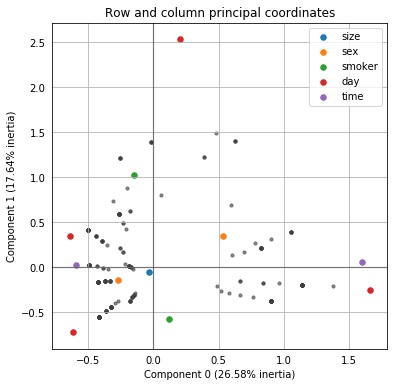

In [69]:
mca.plot_coordinates(X = tips)


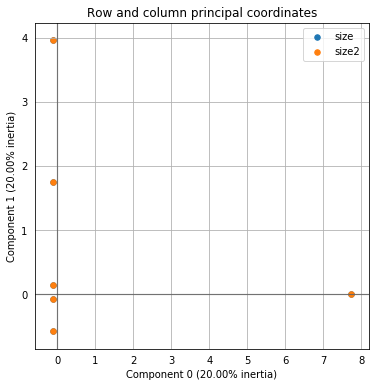

In [123]:
mca.plot_coordinates(X = tips2)


In [124]:
mca.explained_inertia_


[0.20000000000000018, 0.2]

## try wave 2

In [128]:
# income vs legitimacy
col_name = ['se9', 'q123', 'q111']
df_temp = df2[col_name].copy()
print(df_temp.size)
print(df2.se9.unique(), df2.q123.unique(), df2.q111.unique())

# drop nan
df_temp = df_temp.dropna()
print(df_temp.size)

def df_column_datatype_to_str(df, col_name):
    df[col_name] = df[col_name].astype(str)
    return df

df_temp = df_column_datatype_to_str(df_temp, col_name)
print(df_temp.se9.unique(), df_temp.q123.unique(), df_temp.q111.unique())

59394
['5.0' '1.0' '2.0' '3.0' '4.0' '98.0' '99.0' 'nan' '97.0'] ['3.0' '2.0' '4.0' '1.0' '8.0' '5.0' '9.0' '7.0' 'nan'] ['2.0' '1.0' '3.0' '8.0' '4.0' '9.0' '7.0' 'nan']
59394
['5.0' '1.0' '2.0' '3.0' '4.0' '98.0' '99.0' 'nan' '97.0'] ['3.0' '2.0' '4.0' '1.0' '8.0' '5.0' '9.0' '7.0' 'nan'] ['2.0' '1.0' '3.0' '8.0' '4.0' '9.0' '7.0' 'nan']


In [99]:
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(df_temp)
t_mca = mca.transform(df_temp)
t_mca.sample(5)

,0,1
19259,-0.579332,0.705867
14032,-0.963988,0.087037
16116,-0.963988,0.087037
2728,-0.336627,-0.123570
11623,-0.074507,-0.182797


ZeroDivisionError: float division by zero

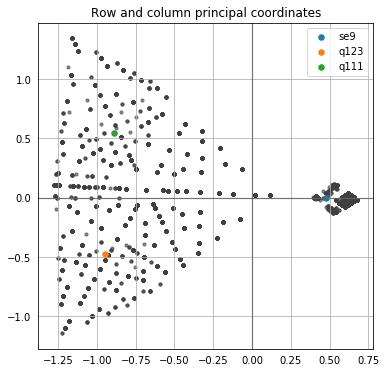

In [100]:
mca.plot_coordinates(X = df_temp)

In [109]:
# find column in df without nan
print(len(df2.columns[df2.isna().any()]), len(df2.columns))

# difference between 2 arrays
np.setdiff1d(df2.columns, df2.columns[df2.isna().any()])

236 252


array(['country', 'idnumber', 'q1', 'q10', 'q119', 'q12', 'q13', 'q15',
       'q2', 'q25', 'q3', 'q4', 'q5', 'q8', 'q9', 'w_all'], dtype=object)